In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
veriler = pd.read_excel("maasDeneyim.xlsx")

In [3]:
veriler

,deneyim,maas
0,0.5,2500
1,0.0,2000
2,1.0,3200
3,2.0,4300
4,3.0,4600
5,4.0,5000
6,15.0,20000
7,12.0,16000
8,11.0,14000
9,8.0,10000


Text(0, 0.5, 'maas')

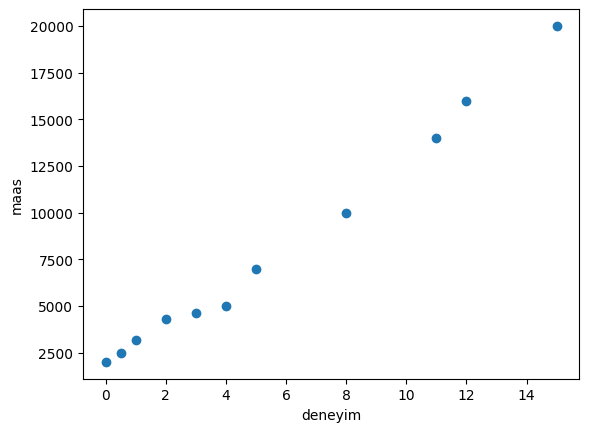

In [4]:
plt.scatter(veriler.deneyim, veriler.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")

## Linear Regression

y = a*x + b

y -> istenen sonuç

a -> ağırlık, eğim(dikey/yatay) : özelliğin sonucu ne kadar etki gösterdiğidir.

x -> özellik : sonucu bulmak için kullanılan verilerdir.

b -> bias, sabit değer : her şartta sabit olarak sonuç için verilecek değerdir.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
linear_reg = LinearRegression()

In [7]:
#verileri hazırladık. reshape yaptık çünkü sklearn matrix istiyor
x = veriler.deneyim.values.reshape(-1,1) 
y = veriler.maas.values.reshape(-1,1)

In [8]:
x.shape

(11, 1)

In [9]:
linear_reg.fit(x,y) #veriye göre uyarlama yaptık

LinearRegression()

## Denklemin açıklaması

In [10]:
linear_reg.predict([[0]]) #tahmin

array([[1471.75029971]])

In [11]:
linear_reg.intercept_ # bias değeri

array([1471.75029971])

In [12]:
linear_reg.coef_ #ağırlık, eğim değeri

array([[1177.4105155]])

y = a*x + b denkleminde x = 0 ise y = b olur.

tahmin işleminde x = 0 yaptık ve çıkan sonuç ile intercept(b) aynı çıktı. bunun anlamı sabit değerin(b) doğru bulunmuş olmasıdır.

coef ile eğimi(a) yani özelliğimizin(x) sonuca(y) ne kadar etki gösterdiğini bulduk.

son durumda denklem ->  maas = 1177 * deneyim + 1471

In [13]:
array = np.array([[0],[1],[2],[5], [7], [8], [12], [24], [3], [15]])

In [14]:
array = array.reshape(-1,1)

In [15]:
y_head = linear_reg.predict(array) # tahmin edilen maaşlar

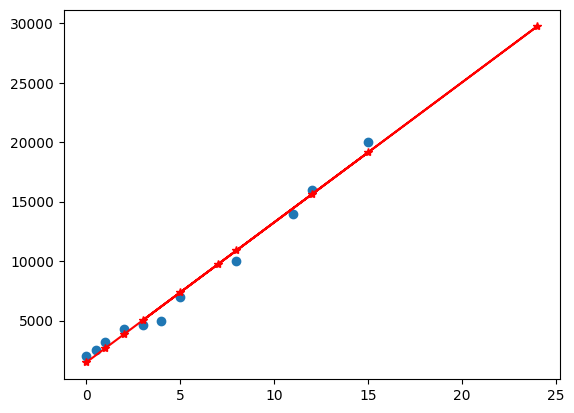

In [16]:
plt.scatter(x, y)
plt.plot(array, y_head, "r*-")

## Multiple Linear Regression

y = a1 * x1 + a2 * x2 + b

a1, a2 -> a1 ilk verinin ağırlığı, a2 ikinci verinin ağırlığıdır

x1, x2 -> x1 ilk özellik, x2 ikinci özellik

b -> bias, sabit değer

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
dataframe = pd.read_excel("maasDeneyimYas.xlsx")

In [19]:
dataframe

,maas,deneyim,yas
0,2500,0.5,24
1,2000,0.0,22
2,3200,1.0,26
3,4300,2.0,27
4,4600,4.0,28
5,5000,7.0,30
6,20000,15.0,37
7,16000,12.0,34
8,14000,11.0,33
9,10000,8.0,32


In [20]:
x = dataframe[["deneyim", "yas"]].values
y = dataframe.maas.values.reshape(-1,1)

In [21]:
multiple_linear_reg = LinearRegression()

In [22]:
multiple_linear_reg.fit(x,y)

LinearRegression()

In [23]:
multiple_linear_reg.intercept_

array([4216.2989081])

In [24]:
multiple_linear_reg.coef_ # deneyim  pozitif etki eder, yaş negatif etki eder

array([[1265.83257507, -126.37056415]])

In [25]:
multiple_linear_reg.predict(np.array([[10,35], [8,35]]))

array([[12451.65491356],
       [ 9919.98976342]])

In [26]:
multiple_linear_reg.predict(np.array([[10,32], [10,27]]))

array([[12830.76660601],
       [13462.61942675]])

## Polynomial Linear Regression

y = b + a1*x + a2*x^2 + ... + an*x^n

verinin bir anda yükselip veya düştüğü veristelerinde hata değerini minimuma indirmek için polynomial linear reg. kullanılır.
Bunun anlamı yükselip çıkan veriyi düz bir çizgi ile fit etmek yerine özelliklerin üssü alınarak eğimli hale getirmektir.

In [27]:
arabaDF = pd.read_excel("arabaFiyatHiz.xlsx")

In [28]:
arabaDF

,fiyat,hiz
0,200,240
1,210,300
2,220,350
3,250,350
4,300,350
5,400,360
6,500,365
7,750,370
8,1000,370
9,2000,375


In [29]:
x = arabaDF.fiyat.values.reshape(-1,1)
y = arabaDF.hiz.values.reshape(-1,1)

Text(0, 0.5, 'Araba Hız')

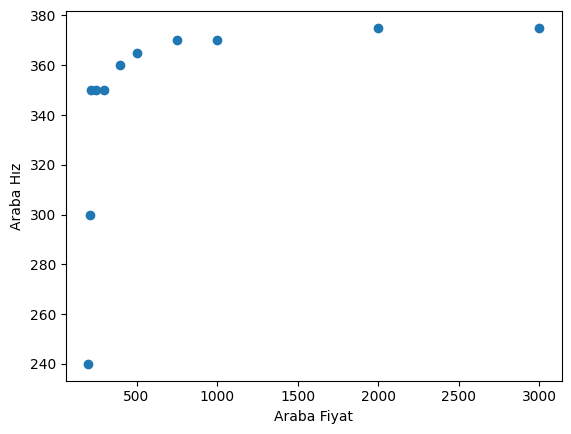

In [30]:
plt.scatter(x,y)
plt.xlabel("Araba Fiyat")
plt.ylabel("Araba Hız")

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
polynomial_lr = LinearRegression()

In [33]:
polynomial_lr.fit(x,y)

LinearRegression()

In [34]:
y_head = polynomial_lr.predict(x)

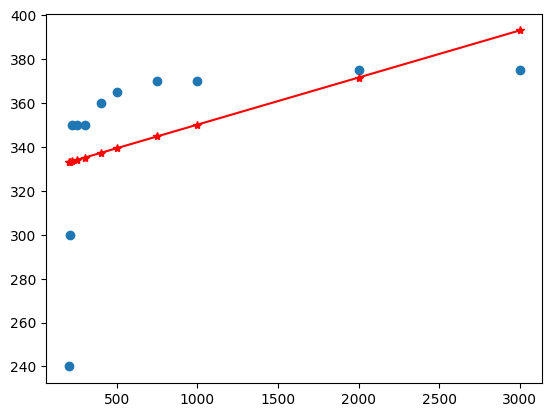

In [35]:
# Linear Regression ile yapım
plt.scatter(x,y)
plt.plot(x, y_head, "r*-")

# Polynomial regression olan verisetlerinde bu tarz veriler karşısında LinearRegression() çalışmaz ve hata değeri çok yüksek olur
# eğimli bir hata çizgisi fit ettirmemiz gerekir

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
polynomial_regression = PolynomialFeatures(degree= 3) 
# degree -> kaça kadar üssü alınacağını belirtir(n)
#degree değerini arttırmak hata oranını azaltır fakat veri daha karmaşık hale gelir

In [38]:
x_polynomial = polynomial_regression.fit_transform(x)

In [39]:
linear_reg2 = LinearRegression()

In [40]:
linear_reg2.fit(x_polynomial,y)

LinearRegression()

In [41]:
y_head2 =linear_reg2.predict(x_polynomial)

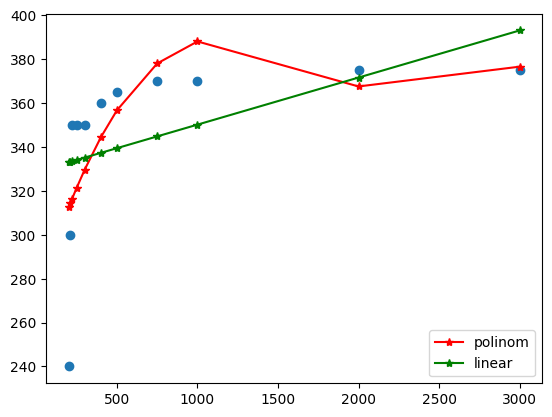

In [42]:
plt.scatter(x,y)
plt.plot(x, y_head2,"r*-", label="polinom") #polimon çizgisi 
plt.plot(x, y_head,"g*-", label="linear") # linear çizgisi
plt.legend()

## Karar Ağacı Regresyonu (Decision Tree Regression)

- Örnekle açıklayalım: Verileri 1 ve 10 arasındaki verilerin cevabı 20, 11 ve 20 arasındaki verilerin cevabı 30 olacak şekilde ayarlar.
Yani veri(x) girildiğinde x < 10 doğru ise sonuç 20, yanlış ise sonuç 30 gibi ayrımlar yapar 

In [43]:
decisionDF = pd.read_excel("kararAgaciRegresyonu.xlsx", header= None)

In [44]:
decisionDF

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [45]:
x = decisionDF.iloc[:,0].values.reshape(-1,1)
y = decisionDF.iloc[:,1].values.reshape(-1,1)

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
tree_reg = DecisionTreeRegressor()

In [48]:
tree_reg.fit(x,y)

DecisionTreeRegressor()

In [49]:
new_x = np.arange(min(x), max(x), 0.01).reshape(-1,1)
y_head = tree_reg.predict(new_x)

Text(0, 0.5, 'Fiyat')

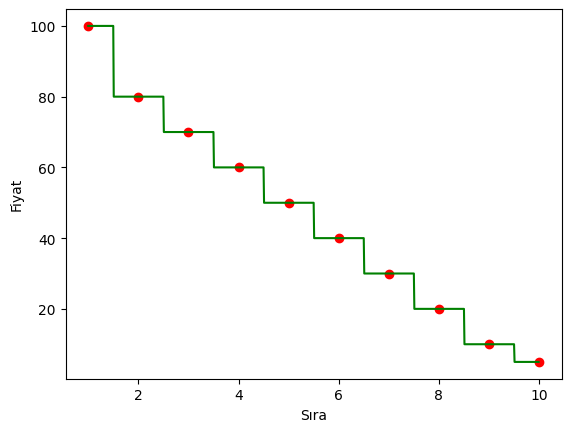

In [50]:
plt.scatter(x,y, color = "red")
plt.plot(new_x, y_head,"g")
plt.xlabel("Sıra")
plt.ylabel("Fiyat")

In [51]:
tree_reg.predict([[3.6]])

array([60.])

## Random Forest Regression

- karar ağacı regresyonu ile aynı mantıkta çalışır. Farkı ise random forest'ta veri seti içerisinden rastgele veriler alarak belirttiğimiz sayıda karar ağacı oluşturur. Daha sonra girilen veriyi bu karar ağaçlarına yerleştirir çıkan sonuçları toplar ve ortalamasını alır. Cevap ortaya çıkar.

- Karar ağacı regresyonunda daha düz sonuçlar çıkarken random forest'ta daha ayrıntılı sonuçlar alınır

In [52]:
forestDF = pd.read_excel("randomForestReg.xlsx", header=None)

In [53]:
forestDF

,0,1
0,1,100
1,2,80
2,3,70
3,4,60
4,5,50
5,6,40
6,7,30
7,8,20
8,9,10
9,10,5


In [54]:
x = forestDF.iloc[:,0].values.reshape(-1,1)
y = forestDF.iloc[:,1].values.reshape(-1,1)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators -> kaç ağaç oluşacağını belirtir
# random_state -> rastegele bölme işlemini aynı şekilde yapar. Yani sonraki çalıştırmada aynı sayılar seçilir

In [57]:
randomForest.fit(x,y)

C:\Users\BehçetEmreYıldırım\AppData\Local\Temp\ipykernel_12188\3924393287.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(x,y)


RandomForestRegressor(random_state=42)

In [58]:
x_tahmin = np.arange(min(x), max(x), 0.01).reshape(-1,1)
y_head = randomForest.predict(x_tahmin)

Text(0, 0.5, 'Fiyat')

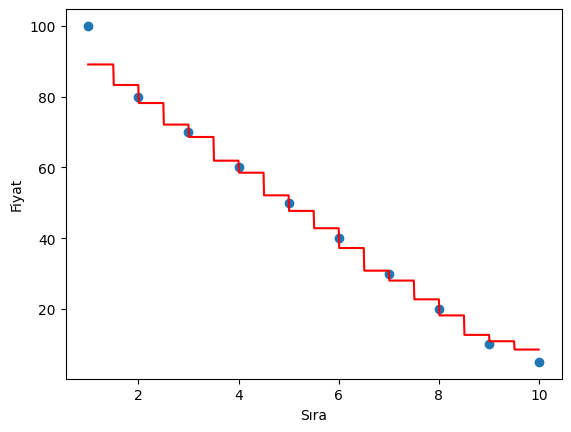

In [59]:
plt.scatter(x,y)
plt.plot(x_tahmin, y_head, "r")
plt.xlabel("Sıra")
plt.ylabel("Fiyat")

In [60]:
randomForest.predict([[9]])

array([12.65])

## Regresyon modellerinin performansını değerlendirme

- Performans değerleri 0 ve 1 arasındadır. 1'e ne kadar yakın olursa makinenin tahmin yeteneği o kadar iyidir.

## 1. R-Square with Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
forestRandom  = RandomForestRegressor(n_estimators=100, random_state=42)

In [63]:
forestRandom.fit(x,y)

C:\Users\BehçetEmreYıldırım\AppData\Local\Temp\ipykernel_12188\94752054.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forestRandom.fit(x,y)


RandomForestRegressor(random_state=42)

In [64]:
y_head = forestRandom.predict(x)

In [65]:
y_head #tahminler

array([89.1 , 83.3 , 72.1 , 61.9 , 52.1 , 42.8 , 30.8 , 22.7 , 12.65,
        8.5 ])

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y, y_head) # doğruluk değerimiz oldukça yüksek

0.9798724794092587

## 2. R-Square with Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
linearDF = pd.read_excel("maasDeneyim.xlsx")

In [70]:
x = linearDF.deneyim.values.reshape(-1,1)
y = linearDF.maas.values.reshape(-1,1)

In [71]:
linear_regres = LinearRegression()

In [72]:
linear_regres.fit(x,y)

LinearRegression()

In [73]:
y_head = linear_regres.predict(x)

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(y, y_head)

0.987726847676635